In [ ]:
!pip install pandas numpy matplotlib scikit-learn xgboost

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

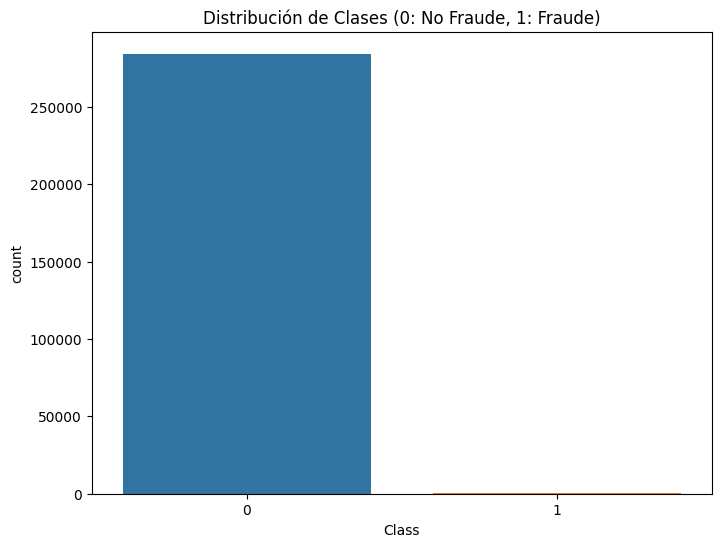

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.85      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Matriz de Confusión:
 [[56856     8]
 [   15    83]]
Precisión del Modelo: 0.9995962220427653


In [8]:
# Importando las bibliotecas necesarias
import pandas as pd
import numpy as np
from joblib import dump
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


# Función para cargar y preprocesar los datos
def cargar_datos(ruta_archivo): # Reemplazar con la ruta real del dataset (si es necesario)
    datos = pd.read_csv(ruta_archivo) # Reemplazar con la ruta real del dataset (si es necesario)
    # Preprocesamiento adicional aquí (si es necesario)
    return datos

# Análisis Exploratorio de Datos
def analisis_exploratorio(datos): 
    print(datos.describe())
    print(datos.info())

    # Visualización de la distribución de las clases (fraude vs no fraude)
    plt.figure(figsize=(8, 6)) # Tamaño de la figura
    sns.countplot(x='Class', data=datos)  # Suponiendo que 'Class' es la columna objetivo
    plt.title('Distribución de Clases (0: No Fraude, 1: Fraude)')
    plt.show()

# Preparación de los datos
def preparar_datos_para_modelo(datos):
    X = datos.drop('Class', axis=1)  # 'Class' es la columna objetivo
    y = datos['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

# Manejo del desequilibrio de clases con SMOTE
def aplicar_smote(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    return X_train_smote, y_train_smote

# Entrenando el modelo
def entrenar_modelo(X_train, y_train):
    modelo = RandomForestClassifier(random_state=42)
    modelo.fit(X_train, y_train)
    dump(modelo, 'fraud_detection_model.joblib')  # Save the model
    return modelo

# Evaluación del modelo
def evaluar_modelo(modelo, X_test, y_test):
    predicciones = modelo.predict(X_test)
    print(classification_report(y_test, predicciones))
    print("Matriz de Confusión:\n", confusion_matrix(y_test, predicciones))
    print("Precisión del Modelo:", accuracy_score(y_test, predicciones))

# Función principal
def main():
    ruta_archivo = '/content/creditcard.csv'  # Reemplazar con la ruta real del dataset (si es necesario)
    datos = cargar_datos(ruta_archivo) # cargar los datos desde el archivo CSV
    analisis_exploratorio(datos) # realizar un análisis exploratorio de los datos
    X_train, X_test, y_train, y_test = preparar_datos_para_modelo(datos) # preparar los datos para el modelo
    X_train_smote, y_train_smote = aplicar_smote(X_train, y_train) # aplicar SMOTE para manejar el desequilibrio de clases
    modelo = entrenar_modelo(X_train_smote, y_train_smote) # entrenar el modelo
    evaluar_modelo(modelo, X_test, y_test) # evaluar el modelo

if __name__ == "__main__": # ejecutar el programa principal (main) si se ejecuta este archivo directamente (no se importa como módulo) 
    main()


In [9]:
from joblib import dump

def entrenar_modelo(X_train, y_train):
    modelo = RandomForestClassifier(random_state=42)
    modelo.fit(X_train, y_train)
    dump(modelo, '/content/fraud_detection_model.joblib')  # Save the model
    return modelo


In [22]:
!pip install -q huggingface_hub

In [28]:
import gradio as gr
import pandas as pd
import numpy as np
from joblib import load
from sklearn.preprocessing import StandardScaler

# Load the trained model
modelo = load('fraud_detection_model.joblib')

# Assuming your model expects a DataFrame with specific columns
# Replace these column names with the actual column names of your dataset
def predict_fraud(feature1, feature2, feature3):
    # Convert input to DataFrame
    input_data = pd.DataFrame([[feature1, feature2, feature3]], columns=feature_names)
    # Preprocess the data (scaling, etc.)
    # Assuming all features need to be scaled. Adjust as necessary.
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(input_data)

    # Make a prediction
    prediction = modelo.predict(scaled_data)
    return 'Fraud' if prediction[0] == 1 else 'No Fraud'
    return result

# Create input fields for each feature
inputs = [gr.Number(label=feature_name) for feature_name in feature_names]

# Create the Gradio app
iface = gr.Interface(
    fn=predict_fraud,
    inputs=[gr.Number(label=name) for name in feature_names],
    outputs="text",
    title="Fraud Detection Model",
    description="Input the feature values to predict fraud"
)

iface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://05971a75a611582af6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 422, in call_prediction
    async def call_prediction(self, events: list[Event], batch: bool):
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1482, in process_api
    batch_sizes = [len(inp) for inp in inputs]
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1109, in call_function
    event_data: data associated with event trigger
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyn

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7862 <> https://05971a75a611582af6.gradio.live
